Handling imbalance dataset
upsampling 
downsampling

In [24]:
import numpy as np
import pandas as pd

In [25]:

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

0    900
1    100
Name: target, dtype: int64


In [26]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


<Axes: xlabel='feature_1', ylabel='feature_2'>

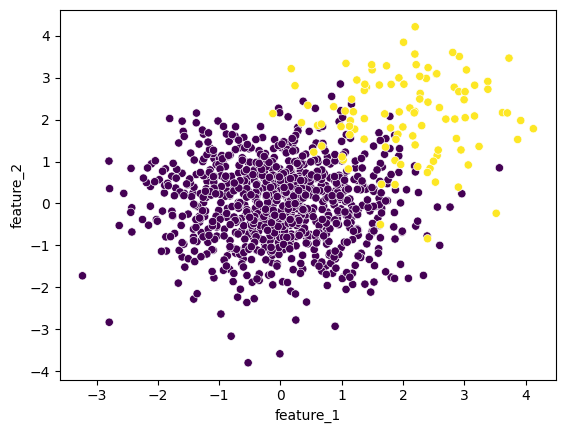

In [47]:
import seaborn as sns
sns.scatterplot(x = df['feature_1'], y = df['feature_2'], c = df['target'])

In [27]:
from sklearn.utils import resample

In [28]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [29]:
df_minority_upsampled = resample(df_minority, n_samples=len(df_majority), replace = True, random_state=42)

In [30]:
df_minority_upsampled.shape

(900, 3)

In [31]:
df_minority_upsampled.tail()

,feature_1,feature_2,target
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1
974,1.160887,2.489203,1


In [32]:
df_resampled = pd.concat([df_minority_upsampled,df_majority])
df_resampled

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [46]:
df_resampled['target'].value_counts()

1    900
0    900
Name: target, dtype: int64

In [33]:
import seaborn as sns


<Axes: xlabel='feature_2', ylabel='feature_1'>

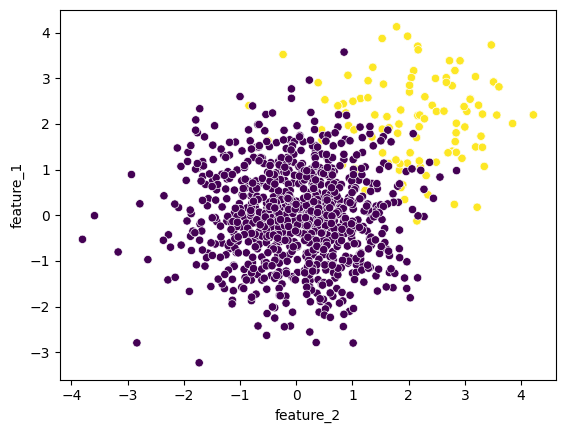

In [49]:
sns.scatterplot(x = df_resampled['feature_2'], y = df_resampled['feature_1'], c = df_resampled['target'])